In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Reading the dataset(test, train and submission)

In [28]:
train = pd.read_csv('train.csv')
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [29]:
train.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [30]:
print('Size of training dataset', train.shape)

Size of training dataset (10000, 12)


In [31]:
test = pd.read_csv('test.csv')
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [32]:
test.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,41.825224,12.946400,6.574800,65.368058,0.376197,79.993068,3.853600,32383.134179,1.990800,0.250886,6186.283200
std,16.280187,3.523364,7.179542,11.442005,0.116960,2.713833,1.877652,9485.096436,1.018592,0.387663,3602.235035
min,0.000000,1.000000,0.000000,20.966272,0.143376,74.740000,1.000000,831.695553,0.000000,0.000368,1.000000
25%,30.593607,11.000000,1.000000,57.702826,0.292583,77.930000,2.000000,26008.851717,1.000000,0.013136,3071.750000
50%,41.461187,13.000000,4.000000,66.066545,0.357404,79.600000,4.000000,32472.865497,2.000000,0.072466,6159.500000
75%,52.751142,15.000000,9.000000,73.119872,0.441699,81.530000,5.000000,38759.519071,3.000000,0.315407,9309.250000
max,100.000000,23.000000,54.000000,97.994531,0.881926,94.200000,7.000000,62315.408444,5.000000,2.365378,12493.000000


In [33]:
print('Size of test dataset', test.shape)

Size of test dataset (2500, 11)


In [34]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,Accident_ID,Severity
0,1,Minor_Damage_And_Injuries
1,10,Highly_Fatal_And_Damaging
2,14,Highly_Fatal_And_Damaging
3,17,Significant_Damage_And_Serious_Injuries
4,21,Minor_Damage_And_Injuries


In [35]:
submission.describe()

,Accident_ID
count,10.000000
mean,33.500000
std,25.513613
min,1.000000
25%,14.750000
50%,30.500000
75%,48.750000
max,85.000000


# Check if there are any null values on train or test dataset

In [36]:
train.isna().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [37]:
test.isna().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

# There are no null values in the train and test data set

In [38]:
 # Dropping severity and Accident Id as part of the train df as severity id target
# column and Accident Id id unique identifier of the accident.
X_train = train.drop(['Severity', 'Accident_ID'], axis=1)

In [39]:
X_train

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
...,...,...,...,...,...,...,...,...,...,...
9995,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150
9996,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898
9997,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173
9998,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381


In [40]:
#Extracting the target variable from the train dataset
Y_train = train['Severity']

In [41]:
Y_train

0                     Minor_Damage_And_Injuries
1                     Minor_Damage_And_Injuries
2             Significant_Damage_And_Fatalities
3       Significant_Damage_And_Serious_Injuries
4             Significant_Damage_And_Fatalities
                         ...                   
9995    Significant_Damage_And_Serious_Injuries
9996                  Highly_Fatal_And_Damaging
9997    Significant_Damage_And_Serious_Injuries
9998                  Minor_Damage_And_Injuries
9999                  Highly_Fatal_And_Damaging
Name: Severity, Length: 10000, dtype: object

# Finding the unique values in the target variable

In [42]:
Y_train.unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

# Mapping the each class to a integer to train the dataset for ease

In [43]:
class_to_integer = {
    'Minor_Damage_And_Injuries': 1,
    'Significant_Damage_And_Fatalities': 2,
    'Significant_Damage_And_Serious_Injuries': 3,
    'Highly_Fatal_And_Damaging': 4
}
integer_to_class = {
    1: 'Minor_Damage_And_Injuries',
    2: 'Significant_Damage_And_Fatalities',
    3: 'Significant_Damage_And_Serious_Injuries',
    4: 'Highly_Fatal_And_Damaging'
}

In [44]:
Y_train = Y_train.map(class_to_integer).astype(np.uint8)

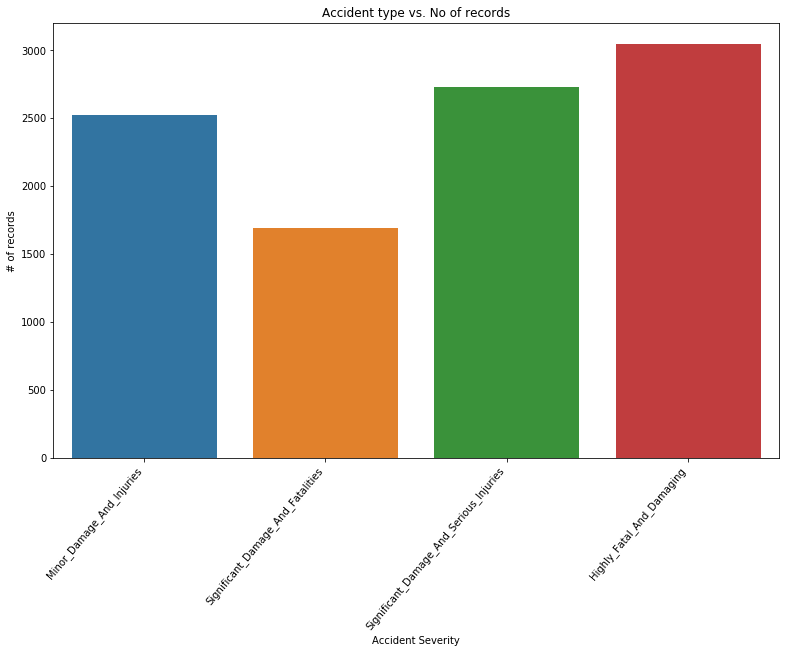

In [45]:
plt.figure(figsize=(13,8))
ax = sns.barplot(np.vectorize(integer_to_class.get)(pd.unique(Y_train)), Y_train.value_counts().sort_index())
ax.set(xlabel='Accident Severity', ylabel='# of records', title='Accident type vs. No of records')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

In [46]:
X_train['Total_Safety_Complaints'] = np.power(2, X_train['Total_Safety_Complaints'])
X_train['Days_Since_Inspection'] = np.power(2, X_train['Days_Since_Inspection'])
X_train['Safety_Score'] = np.power(2, X_train['Safety_Score'])
X_train['Violations'] = np.power(2, X_train['Violations'])

In [47]:
rf = RandomForestClassifier(criterion='entropy',max_features=8,n_estimators=1000)
rf.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
test['Total_Safety_Complaints'] = np.power(2, test['Total_Safety_Complaints'])
test['Days_Since_Inspection'] = np.power(2, test['Days_Since_Inspection'])
test['Safety_Score'] = np.power(2, test['Safety_Score'])
test['Violations'] = np.power(2, test['Violations'])

In [49]:
preds = rf.predict(test.drop(['Accident_ID'], axis=1))

In [50]:
preds

array([4, 2, 3, ..., 3, 3, 4], dtype=uint8)

In [51]:
submission = pd.DataFrame([test['Accident_ID'], np.vectorize(integer_to_class.get)(preds)], index=['Accident_ID', 'Severity']).T
submission.to_csv('submission.csv', index=False)
submission.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities


In [52]:
submission

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities
...,...,...
2495,12484,Highly_Fatal_And_Damaging
2496,12487,Significant_Damage_And_Serious_Injuries
2497,12488,Significant_Damage_And_Serious_Injuries
2498,12491,Significant_Damage_And_Serious_Injuries
